In [1]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [3]:
#Cual es el tipo de los atributos?
data. dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hpw                int64
Country           object
C                 object
dtype: object

In [4]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


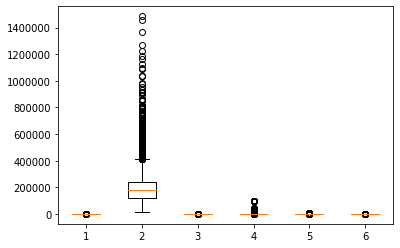

In [5]:
#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['Age'],data['Fnlwgt'],data['Education-num'],data['Capital-gain'],data['Capital-loss'], data['Hpw']))
plt.show()

In [6]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.corr()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


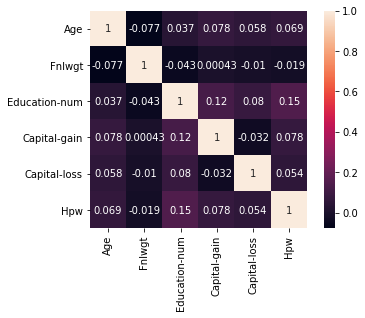

In [8]:
sns.heatmap(data.corr(), square=True, annot=True)

In [9]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

3

In [10]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hpw                  0
Country            583
C                    0
dtype: int64

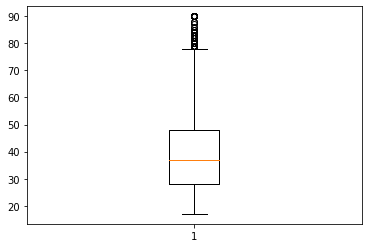

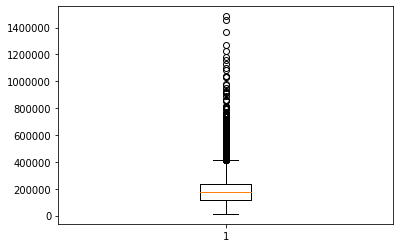

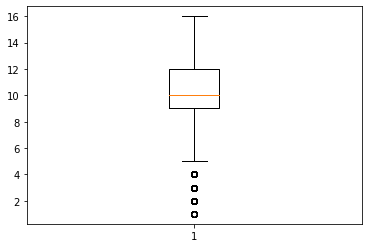

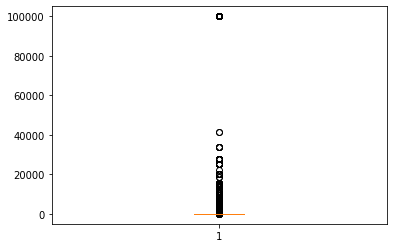

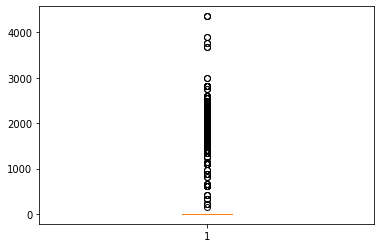

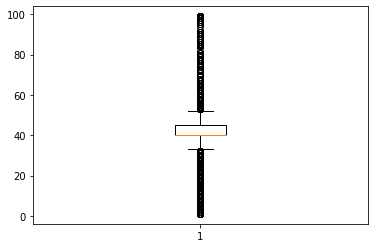

In [11]:
#En qué atributos hay datos atípicos?
plt.boxplot(data['Age'])
plt.show()
plt.boxplot(data['Fnlwgt'])
plt.show()
plt.boxplot(data['Education-num'])
plt.show()
plt.boxplot(data['Capital-gain'])
plt.show()
plt.boxplot(data['Capital-loss'])
plt.show()
plt.boxplot(data['Hpw'])
plt.show()


In [12]:
#Cual es la distribución de los valores para los atributos categóricos?

#d1 = data.dropna()
#plt.hist(d1['Workclass'])
#plt.show()

#plt.hist(data['Education'].dropna())
#plt.show()

#plt.hist(data['Marital-status'].dropna())
#plt.show()

#plt.hist(data['Occupation'].dropna())
#plt.show()

#plt.hist(data['Relationship'].dropna())
#plt.show()

#plt.hist(data['Race'].dropna())
#plt.show()

#plt.hist(data['Sex'].dropna())
#plt.show()

#plt.hist(data['Country'].dropna())
#plt.show()

#plt.hist(data['C'].dropna())
#plt.show()

In [13]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['C'].value_counts())

 <=50K    24720
 >50K      7841
Name: C, dtype: int64


# Análisis de los Resultados

Escribir aquí las conclusiones obtenidas del análisis del conjunto de datos.
-   El conjunto es viable?
-   Cuáles son las dificultades más significativas que tiene el conjunto de datos?

-   Es necesario eliminar atributos?
-   Es necesario eliminar registros?
-   Se van a reemplazar los valores nulos por algún valor?
-   Cómo se van a manejar los datos atípicos?
-   Es necesario normalizar los valores de los atributos?
-   Están los datos desbalanceados?


# Práctica 2

A partir de este punto se empieza a aplicar el plan de ajuste del conjunto de datos.

In [14]:
# Eliminar los registros que tienen más de 2 datos faltantes
data = data.dropna(axis = 0, thresh = 13)
data.shape

#Cuántos registros se eliminaron?

(32534, 15)

In [15]:
# Reemplazar los datos faltantes por la moda en los atributos Workclass, Occupation, Country
data.Workclass.fillna(data.Workclass.mode()[0], inplace=True)
data.Occupation.fillna(data.Workclass.mode()[0], inplace=True)
data.Country.fillna(data.Workclass.mode()[0], inplace=True)
data


/home/ananda/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [16]:
# Convertir los atributos categóricos a escala numérica
# Esto tiene el problema que modifica los valores de todas las columnas, incluso las numéricas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform) 
data

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,39,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,39,0
2,21,3,14073,11,8,0,5,1,4,1,0,0,39,39,0
3,36,3,15323,1,6,2,5,0,2,1,0,0,39,39,0
4,11,3,19340,9,12,2,10,5,2,0,0,0,39,4,0
5,20,3,17687,12,13,2,3,5,4,0,0,0,39,39,0
6,32,3,8530,6,4,3,7,1,2,0,0,0,15,22,0
7,35,5,13608,11,8,2,3,0,4,1,0,0,44,39,1
8,14,3,1318,12,13,4,10,1,4,0,105,0,49,39,1
9,25,3,8454,9,12,2,3,0,4,1,79,0,39,39,1


In [17]:
data.drop('C', axis=1).corr()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country
Age,1.000000,0.040558,-0.078568,-0.010255,0.036768,-0.266435,0.004144,-0.264126,0.028322,0.089054,0.125984,0.064893,0.069417,0.000209
Workclass,0.040558,1.000000,-0.027888,0.004877,0.003540,-0.020482,0.006064,-0.057951,0.048356,0.071590,0.017263,0.007066,0.040755,-0.002250
Fnlwgt,-0.078568,-0.027888,1.000000,-0.027037,-0.042499,0.029938,0.001220,0.007167,-0.009043,0.025756,-0.004385,-0.010044,-0.019212,-0.068957
Education,-0.010255,0.004877,-0.027037,1.000000,0.359101,-0.038591,-0.032310,-0.010865,0.014309,-0.027469,0.031406,0.016301,0.056222,0.078153
Education-num,0.036768,0.003540,-0.042499,0.359101,1.000000,-0.069279,0.095724,-0.094778,0.032270,0.012519,0.154347,0.084425,0.150431,0.086595
Marital-status,-0.266435,-0.020482,0.029938,-0.038591,-0.069279,1.000000,0.028315,0.186012,-0.067961,-0.129721,-0.075101,-0.035448,-0.193251,-0.023266
Occupation,0.004144,0.006064,0.001220,-0.032310,0.095724,0.028315,1.000000,-0.043236,-0.000952,0.048554,0.018619,0.012329,-0.003003,0.000113
Relationship,-0.264126,-0.057951,0.007167,-0.010865,-0.094778,0.186012,-0.043236,1.000000,-0.115961,-0.582259,-0.093504,-0.064418,-0.250963,-0.009723
Race,0.028322,0.048356,-0.009043,0.014309,0.032270,-0.067961,-0.000952,-0.115961,1.000000,0.087098,0.025176,0.019228,0.042494,0.127849
Sex,0.089054,0.071590,0.025756,-0.027469,0.012519,-0.129721,0.048554,-0.582259,0.087098,1.000000,0.077779,0.049750,0.230951,-0.000801


In [18]:
# Normalizar los valores de las columnas Fnlwgt, Capital-gain y Capital-loss
#scaler = preprocessing.StandardScaler()
#scaler.fit(data)
#data = scaler.transform(data)

# Normalización de los atributos Fnlwgt, Capital-gain y Capital-loss
data['Fnlwgt'] = preprocessing.scale(data['Fnlwgt'])
data['Capital-gain'] = preprocessing.scale(data['Capital-gain'])
data['Capital-loss'] = preprocessing.scale(data['Capital-loss'])
data

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,22,6,-1.293759,9,12,4,0,1,4,1,0.793998,-0.204134,39,39,0
1,33,5,-1.251567,9,12,2,3,0,4,1,-0.278969,-0.204134,12,39,0
2,21,3,0.592779,11,8,0,5,1,4,1,-0.278969,-0.204134,39,39,0
3,36,3,0.799600,1,6,2,5,0,2,1,-0.278969,-0.204134,39,39,0
4,11,3,1.464240,9,12,2,10,5,2,0,-0.278969,-0.204134,39,4,0
5,20,3,1.190740,12,13,2,3,5,4,0,-0.278969,-0.204134,39,39,0
6,32,3,-0.324348,6,4,3,7,1,2,0,-0.278969,-0.204134,15,22,0
7,35,5,0.515842,11,8,2,3,0,4,1,-0.278969,-0.204134,44,39,1
8,14,3,-1.517621,12,13,4,10,1,4,0,4.227494,-0.204134,49,39,1
9,25,3,-0.336922,9,12,2,3,0,4,1,3.111608,-0.204134,39,39,1


In [19]:
# Preparación de conjunto alterno con balanceo entre clases 60-40
g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

Age  Workclass    Fnlwgt  Education  Education-num  Marital-status  \
C                                                                            
0 0      25          3  0.097898          8             10               2   
  1      13          3 -1.371358         11              8               4   
  2      20          3 -1.283335          6              4               2   
  3      39          1  0.338638          2              7               4   
  4      15          3  0.572428         15              9               0   
  5      51          3  1.528933         15              9               2   
  6      19          3 -0.039266          4              2               5   
  7      14          3 -1.180255         15              9               4   
  8      25          3 -1.577186         15              9               2   
  9      10          3 -1.141538         11              8               2   
  10      5          3 -1.677949          2              7               4   
  11     23          3  0.188899          7             11               2   
  12     13          3  1.252290         11              8               4   
  13     18          3 -0.894511         11              8               0   
  14      6          3  1.079884         11              8               2   
  15      1          3 -0.835112         15              9               4   
  16     30          3 -0.933890         15              9               4   
  17     16          3  0.614288         11              8               2   
  18      3          3  0.553731         15              9               4   
  19     20          3  1.442565          9             12               4   
  20      5          3 -1.332144         15              9               4   
  21      2          3  0.066296         15              9               4   
  22     14          3 -1.409744         15              9               2   
  23     12          3  0.831533         12             13               4   
  24     30          3  1.724338         15              9               2   
  25     13          3  0.875214         11              8               5   
  26     18          3 -0.974096         11              8               0   
  27     38          1 -0.631104          9             12               6   
  28      7          3  0.349558         11              8               4   
  29     37          3 -0.600164         11              8               2   
...     ...        ...       ...        ...            ...             ...   
1 7807   36          3  0.266829         15              9               2   
  7808   29          4  0.580204         10             15               2   
  7809   38          3 -1.643203          9             12               2   
  7810   20          3 -0.927272          1              6               2   
  7811   31          3 -0.318557         15              9               4   
  7812   31          4  1.629365         10             15               2   
  7813   31          4 -0.738155         15              9               2   
  7814   31          5  0.886796         15              9               2   
  7815   15          3 -0.636564         11              8               2   
  7816   16          4  0.399360          9             12               2   
  7817   17          3  0.095085         15              9               2   
  7818   38          6 -0.801856         10             15               2   
  7819   20          3 -0.833458          9             12               5   
  7820   29          4  0.601383         12             13               2   
  7821   30          3  0.851719         11              8               2   
  7822   41          3  1.394417          9             12               2   
  7823   22          0  1.612489         14             14               2   
  7824   21          4  1.085840         15              9               2   
  7825   44          3 -0.5321

In [ ]:
# Cosas que tengo pendientes para mejorar el plan:
# - Al transformar la columna Education, usar un OrdinalEncoder, asignando los valores a los 
# niveles educativos en orden lógico. Esto podría acentuar la correlación de este atributo 
# con Education-num (hay que probarlo para ver que si se puede eliminar uno de los dos atributos)
